19732943.758196723
6.0
156498991.0


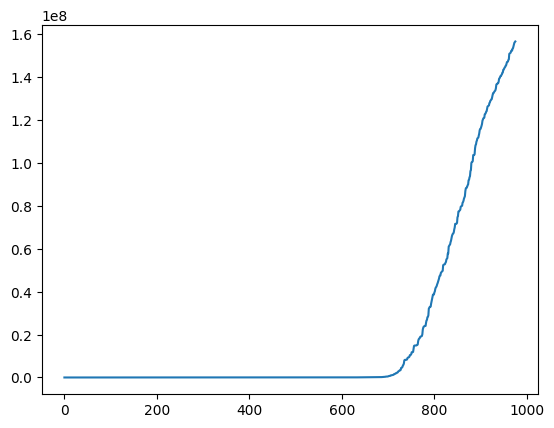

9775488.693003332
13.0
159538957.0


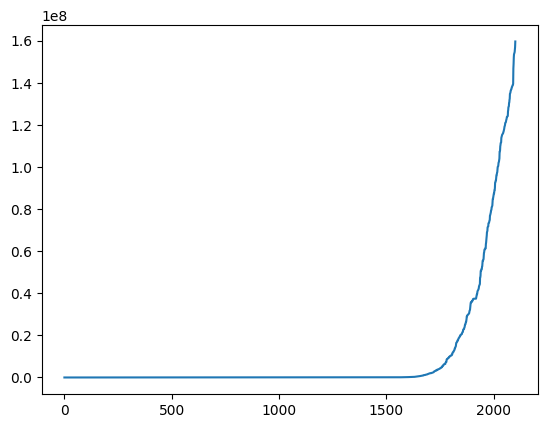

16739032.282352941
60.0
161610001.0


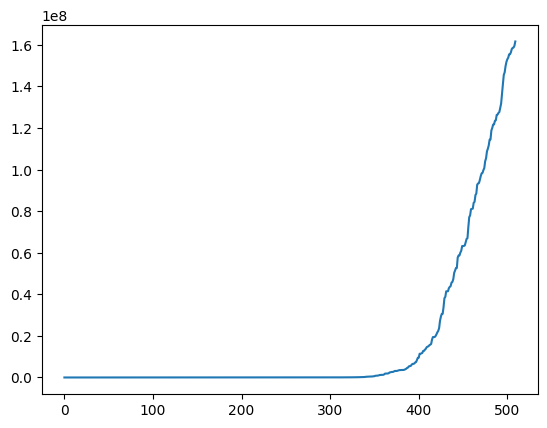

In [51]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
from statistics import mean

q_py = "questions_python.csv"
a_py = "answers_python.csv"

q_cpp = "questions_cpp.csv"
a_cpp = "answers_cpp.csv"

q_java = "questions_java.csv"
a_java = "answers_java.csv"

def parseTimeGaps(q_in, a_in):

    qs = pd.read_csv(q_in)
    ans = pd.read_csv(a_in)

    ans_times = ans[['Id', 'CreationDate']]
    q_times = qs[['Id', 'CreationDate']]

    ans_times.sort_values(by=['Id'])
    q_times.sort_values(by=['Id'])

    ans_gaps = []
    i = 0

    for qindex, qrow in q_times.iterrows():
        for aindex, arow in ans_times.iloc[i:].iterrows():
            if(qrow['Id'] == arow['Id']):
                q_time = parser.parse(qrow['CreationDate'])
                a_time = parser.parse(arow['CreationDate'])
                t = a_time - q_time
                ans_gaps.append([arow['Id'],t.total_seconds()])
            else:
                i = aindex
                break
        
    gap_list = []
    for Id, time in ans_gaps:
        gap_list.append(time)

    print(mean(gap_list))
    print(min(gap_list))
    print(max(gap_list))

    gap_list.sort()

    plt.plot(gap_list)
    plt.show()
    
    return gap_list, ans_gaps

py_gap_list, py_gaps = parseTimeGaps(q_py, a_py)
cpp_gap_list, cpp_gaps = parseTimeGaps(q_cpp, a_cpp)
java_gap_list, java_gaps = parseTimeGaps(q_java, a_java)

13474926.488988012
6.0
161610001.0


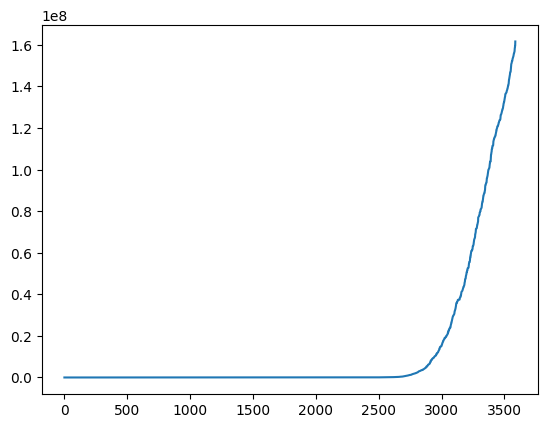

In [83]:
all_gaps = []

for val in py_gap_list:
    all_gaps.append(val)
    
for val in java_gap_list:
    all_gaps.append(val)
    
for val in cpp_gap_list:
    all_gaps.append(val)

print(mean(all_gaps))
print(min(all_gaps))
print(max(all_gaps))

all_gaps.sort()

plt.plot(all_gaps)
plt.show()

In [84]:
a_py = pd.read_csv('answers_python.csv')
q_py = pd.read_csv('questions_python.csv')
a_cpp = pd.read_csv('answers_cpp.csv')
q_cpp = pd.read_csv('questions_cpp.csv')
a_java = pd.read_csv('answers_java.csv')
q_java = pd.read_csv('questions_java.csv')
t = pd.read_csv('Tags.csv', usecols = ['Id', 'Tag'], low_memory=False)

cpp_tags = ['boost', 'opencv', 'sqlite', 'ffmpeg', 'openssl', 'poco', 'googletest', 'tbb', 'wt1']
java_tags = ['spring', 'apache', 'junit', 'jaxb', 'log4j', 'jms', 'httpclient', 'guava', 'gson', 'jmx']
py_tags = ['django', 'numpy', 'matplotlib', 'scipy', 'pygame', 'scrapy', 'pandas', 'pybrain']


cpp_list_lists = [[], [], [], [], [], [], [], [], []]
java_list_lists = [[], [], [], [], [], [], [], [], [], []]
python_list_lists = [[], [], [], [], [], [], [], []]

for index, row in t.iterrows():
    if row['Tag'] in py_tags:
        i = py_tags.index(row['Tag'])
        python_list_lists[i].append(row['Id'])
    elif row['Tag'] in java_tags:
        i = java_tags.index(row['Tag'])
        java_list_lists[i].append(row['Id'])
    elif row['Tag'] in cpp_tags:
        i = cpp_tags.index(row['Tag'])
        cpp_list_lists[i].append(row['Id'])

In [114]:
def calcMeanTime(gaps, l, index):
    times = []
    for (value, time) in gaps:
        if value in l[index]:
            times.append(time)
    if len(times) != 0:
        return mean(times)
    else:
        return 0

py_libs = [
    calcMeanTime(py_gaps, python_list_lists, 0), 
    calcMeanTime(py_gaps, python_list_lists, 1),
    calcMeanTime(py_gaps, python_list_lists, 2), 
    calcMeanTime(py_gaps, python_list_lists, 3),
    calcMeanTime(py_gaps, python_list_lists, 4),
    calcMeanTime(py_gaps, python_list_lists, 5),
    calcMeanTime(py_gaps, python_list_lists, 6),
    calcMeanTime(py_gaps, python_list_lists, 7)
]
print(py_libs)

cpp_libs = [
    calcMeanTime(cpp_gaps, cpp_list_lists, 0), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 1), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 2), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 3), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 4), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 5), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 6), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 7), 
    calcMeanTime(cpp_gaps, cpp_list_lists, 8)  
]
print(cpp_libs)

java_libs = [
    calcMeanTime(java_gaps, java_list_lists, 0),    
    calcMeanTime(java_gaps, java_list_lists, 1),
    calcMeanTime(java_gaps, java_list_lists, 2),
    calcMeanTime(java_gaps, java_list_lists, 3),
    calcMeanTime(java_gaps, java_list_lists, 4),
    calcMeanTime(java_gaps, java_list_lists, 5),
    calcMeanTime(java_gaps, java_list_lists, 6),
    calcMeanTime(java_gaps, java_list_lists, 7),
    calcMeanTime(java_gaps, java_list_lists, 8),
    calcMeanTime(java_gaps, java_list_lists, 9)
]
print(java_libs)

[23608247.414634146, 24759750.583333332, 0, 0, 21238096.0, 0, 0, 0]
[12933277.111111112, 0, 4741.5, 0, 0, 0, 0, 0, 0]
[28962739.04347826, 49174854.6, 0, 0, 1539792.7142857143, 84783.25, 0, 0, 0, 0]


In [1]:
#import libraries
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

a = pd.read_csv('Answers.csv', usecols = ['Id', 'CreationDate', 'ParentId'], low_memory=False)
q = pd.read_csv('Questions.csv', usecols = ['Id', 'CreationDate'], low_memory=False)
t = pd.read_csv('Tags.csv', usecols = ['Id', 'Tag'], low_memory=False)

q_clean = q
q_clean = q_clean[q_clean['Id'].str.contains('\D') == False]
q_clean['Id'] = q_clean['Id'].astype(str).astype(int)
q_clean.rename(columns={'CreationDate' : 'AskDate'}, inplace=True)

a_clean = a
a_clean.drop(["Id"], axis=1, inplace=True)
a_clean['ParentId'] = a_clean['ParentId'].astype(str).astype(int)
a_clean.rename(columns={'ParentId' : 'Id'}, inplace=True)
a_clean.rename(columns={'CreationDate' : 'AnswerDate'}, inplace=True)

In [23]:
merge1 = pd.merge(t, q_clean, on='Id', how='inner')
df = pd.merge(merge1, a_clean, on='Id', how='inner')
df['Category'] = ''
df['AnsGaps'] = 0

cpp_tags = ['boost', 'opencv', 'sqlite', 'ffmpeg', 'openssl', 'poco', 'googletest', 'tbb', 'wt1']
java_tags = ['spring', 'apache', 'junit', 'jaxb', 'log4j', 'jms', 'httpclient', 'guava', 'gson', 'jmx']
py_tags = ['django', 'numpy', 'matplotlib', 'scipy', 'pygame', 'scrapy', 'pandas', 'pybrain']

def update_cat(row):
    if row['Tag'] in cpp_tags:
        row['Category'] = 'cpp'
    elif row['Tag'] in java_tags:
        row['Category'] = 'java'
    elif row['Tag'] in py_tags:
        row['Category'] = 'python'
    return row

df = df.apply(update_cat, axis=1)

df['Category'].replace('', np.nan, inplace=True)
df.dropna(subset=['Category'], inplace=True)

6898566.544429291
42.0
156498991.0


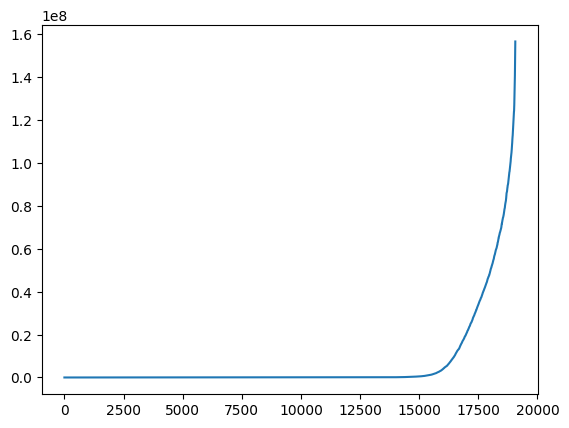

In [61]:
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
from statistics import mean

def parseTimeGaps(df):
    
    tags = []
    ans_gaps = []
    
    for index, row in df.iterrows():
        a_time = parser.parse(row['AnswerDate'])
        q_time = parser.parse(row['AskDate'])
        ans_gaps.append((a_time - q_time).total_seconds())
        tags.append(row['Tag'])

    gaps = pd.DataFrame({'Tag': tags, 'TimeGap': ans_gaps})
    
    ans_gaps.sort()
    print(mean(ans_gaps))
    print(min(ans_gaps))
    print(max(ans_gaps))

    plt.plot(ans_gaps)
    plt.show()
    
    return gaps

gaps = parseTimeGaps(df)

In [25]:
def calcMeanTime(df):
    times = []
    for index, row in df.iterrows():
        times.append(row['TimeGap'])
    if len(times) != 0:
        return mean(times)
    else:
        return 0

boost_df = gaps[gaps['Tag']=='boost']
opencv_df = gaps[gaps['Tag']=='opencv']
sqlite_df = gaps[gaps['Tag']=='sqlite']
ffmpeg_df = gaps[gaps['Tag']=='ffmpeg']
openssl_df = gaps[gaps['Tag']=='openssl']
poco_df = gaps[gaps['Tag']=='poco']
googletest_df = gaps[gaps['Tag']=='googletest']
tbb_df = gaps[gaps['Tag']=='tbb']
wt1_df = gaps[gaps['Tag']=='wt1']
spring_df = gaps[gaps['Tag']=='spring']
apache_df = gaps[gaps['Tag']=='apache']
junit_df = gaps[gaps['Tag']=='junit']
jaxb_df = gaps[gaps['Tag']=='jaxb']
log4j_df = gaps[gaps['Tag']=='log4j']
jms_df = gaps[gaps['Tag']=='jms']
httpclient_df = gaps[gaps['Tag']=='httpclient']
guava_df = gaps[gaps['Tag']=='guava']
gson_df = gaps[gaps['Tag']=='gson']
jmx_df = gaps[gaps['Tag']=='jmx']
django_df = gaps[gaps['Tag']=='django']
numpy_df = gaps[gaps['Tag']=='numpy']
matplot_df = gaps[gaps['Tag']=='matplotlib']
scipy_df = gaps[gaps['Tag']=='scipy']
pygame_df = gaps[gaps['Tag']=='pygame']
scrapy_df = gaps[gaps['Tag']=='scrapy']
pandas_df = gaps[gaps['Tag']=='pandas']
pybrain_df = gaps[gaps['Tag']=='pybrain']

cpp_libs = [
    calcMeanTime(boost_df), 
    calcMeanTime(opencv_df), 
    calcMeanTime(sqlite_df), 
    calcMeanTime(ffmpeg_df), 
    calcMeanTime(openssl_df), 
    calcMeanTime(poco_df), 
    calcMeanTime(googletest_df), 
    calcMeanTime(tbb_df),
    calcMeanTime(wt1_df) 
]
print(cpp_libs)

java_libs = [
    calcMeanTime(spring_df), 
    calcMeanTime(apache_df), 
    calcMeanTime(junit_df), 
    calcMeanTime(jaxb_df), 
    calcMeanTime(log4j_df), 
    calcMeanTime(jms_df), 
    calcMeanTime(httpclient_df), 
    calcMeanTime(guava_df),
    calcMeanTime(gson_df), 
    calcMeanTime(jmx_df) 
]
print(java_libs)

py_libs = [
    calcMeanTime(django_df), 
    calcMeanTime(numpy_df), 
    calcMeanTime(matplot_df), 
    calcMeanTime(scipy_df), 
    calcMeanTime(pygame_df), 
    calcMeanTime(scrapy_df), 
    calcMeanTime(pandas_df), 
    calcMeanTime(pybrain_df) 
]
print(py_libs)

[4479167.048414024, 7935204.9488372095, 6272314.19095698, 10994538.964539006, 8149480.132743363, 3225335.330882353, 12583381.042553192, 3599836.4736842103, 0]
[7017372.414050822, 5607744.716073523, 9629474.70596206, 8634227.671140939, 5827185.120111732, 4837225.867647059, 8276663.829113924, 2571025.491017964, 4105458.2195121953, 14469169.951807229]
[7147956.919074139, 8914613.885036496, 9885436.073800739, 8877012.733766234, 9780991.306306306, 6319606.728571429, 2762750.0, 15075.333333333334]


[3225335.330882353, 3599836.4736842103, 4479167.048414024, 6272314.19095698, 7935204.9488372095, 8149480.132743363, 10994538.964539006, 12583381.042553192]
[2571025.491017964, 4105458.2195121953, 4837225.867647059, 5607744.716073523, 5827185.120111732, 7017372.414050822, 8276663.829113924, 8634227.671140939, 9629474.70596206, 14469169.951807229]
[15075.333333333334, 2762750.0, 6319606.728571429, 7147956.919074139, 8877012.733766234, 8914613.885036496, 9780991.306306306, 9885436.073800739]


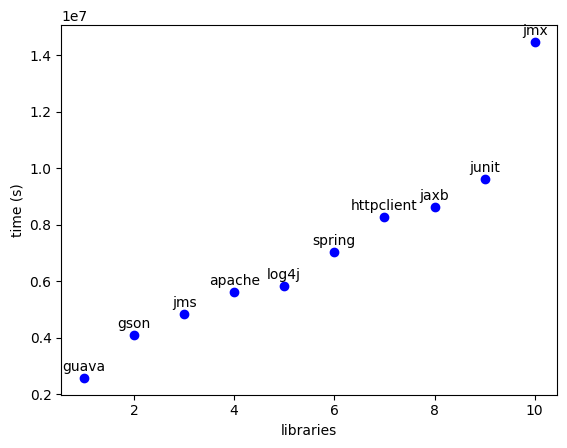

In [46]:
print(cpp_libs)
print(java_libs)
print(py_libs)

cpp_libs.sort()
java_libs.sort()
py_libs.sort()

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, java_libs, 'bo')
plt.xlabel('libraries')
plt.ylabel('time (s)')
for i in range(len(java_libs)):
    plt.annotate(java_tags[i], (x[i], java_libs[i]), textcoords="offset points", xytext=(0, 5), ha='center')
plt.show()

cpp_tags = ['poco', 'tbb', 'boost', 'sqlite', 'opencv', 'openssl', 'ffmpeg', 'googletest']
java_tags = ['guava', 'gson', 'jms', 'apache', 'log4j', 'spring', 'httpclient', 'jaxb', 'junit', 'jmx']
py_tags = ['pybrain', 'pandas', 'scrapy', 'django', 'scipy', 'numpy', 'pygame', 'matplotlib']



In [50]:
print(len(boost_df))
print(len(opencv_df))
print(len(sqlite_df))
print(len(ffmpeg_df))
print(len(openssl_df))
print(len(poco_df))
print(len(googletest_df))
print(len(tbb_df))
print(len(wt1_df))
print(len(spring_df))
print(len(apache_df))
print(len(junit_df))
print(len(jaxb_df))
print(len(log4j_df))
print(len(jms_df))
print(len(httpclient_df))
print(len(guava_df))
print(len(gson_df))
print(len(jmx_df))
print(len(django_df))
print(len(numpy_df))
print(len(matplot_df))
print(len(scipy_df))
print(len(pygame_df))
print(len(scrapy_df))
print(len(pandas_df))
print(len(pybrain_df))

1198
645
2278
282
226
136
47
19
0
2676
2557
738
298
358
204
158
167
82
83
5746
548
271
154
111
70
9
3


In [66]:
#gaps = gaps.sort_values(by=['TimeGap'])
df2 = gaps.sort_values('TimeGap', ascending=True)


print(df2.head(50))
plt.plot(x, df2['TimeGap'])

SyntaxError: invalid syntax (2423561185.py, line 4)